In [116]:
from transformers import GPT2Model, GPT2Tokenizer
import pandas as pd
import numpy as np
import torch
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [117]:
def cosine_similarity(embeddings1, embeddings2):
    # Calculate cosine similarities for each corresponding layer's embeddings
    cosine_similarity = [1 - cosine(embedding1, embedding2) for embedding1, embedding2 in zip(embeddings1, embeddings2)]
    return cosine_similarity

In [118]:
def euclidean_distances(embeddings1, embeddings2):

    if len(embeddings1) != len(embeddings2):
        raise ValueError("Both embeddings lists should have the same number of layers.")

    # Calculate Euclidean distance for each layer
    euclidean_distances = [np.linalg.norm(embedding1 - embedding2) for embedding1, embedding2 in zip(embeddings1, embeddings2)]
    return euclidean_distances

In [119]:
def get_word_embeddings(sentence, word1, word2, tokenizer, model):
    # Tokenize input text and convert to IDs
    inputs = tokenizer(sentence, return_tensors="pt")
    token_ids = inputs['input_ids'].squeeze().tolist()  # Convert tensor to list of token IDs
    tokens = tokenizer.convert_ids_to_tokens(token_ids)  # Convert token IDs to tokens

    # Find indices of tokens corresponding to the target words
    indices_word1 = [i for i, token in enumerate(tokens) if word1 in token]
    indices_word2 = [i for i, token in enumerate(tokens) if word2 in token]

    # Get model output
    outputs = model(**inputs)
    hidden_states = outputs.hidden_states  # Tuple of hidden states from each layer

    # Extract embeddings for each target word from each layer
    embeddings_word1 = [hidden_states[layer][0, idx].detach().numpy() for layer in range(len(hidden_states)) for idx in indices_word1]
    embeddings_word2 = [hidden_states[layer][0, idx].detach().numpy() for layer in range(len(hidden_states)) for idx in indices_word2]

    return embeddings_word1, embeddings_word2

In [120]:
# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_hidden_states=True)

In [121]:
df = pd.read_csv("5000_synonym.csv", index_col = "rank")
df.head()

,lemma,PoS,freq,synonym,synset
rank,,,,,
26,say,v,4096416,tell,Synset('state.v.01')
31,go,v,3546732,belong,Synset('belong.v.03')
34,get,v,3347615,convey,Synset('bring.v.04')
39,know,v,2761628,NaN,NaN
49,would,v,2349400,NaN,NaN


In [124]:
# Example usage
pos = "nouns"
word1 = "blend"
word2 = "go"
sentence = "What is the similarity between {0} {1} and {2}".format(pos, word1, word2)
embeddings_word1, embeddings_word2 = get_word_embeddings(sentence, word1, word2, tokenizer, model)

In [125]:
c = cosine_similarity(embeddings_word1, embeddings_word2)

Text(0, 0.5, 'Cosine Similarity')

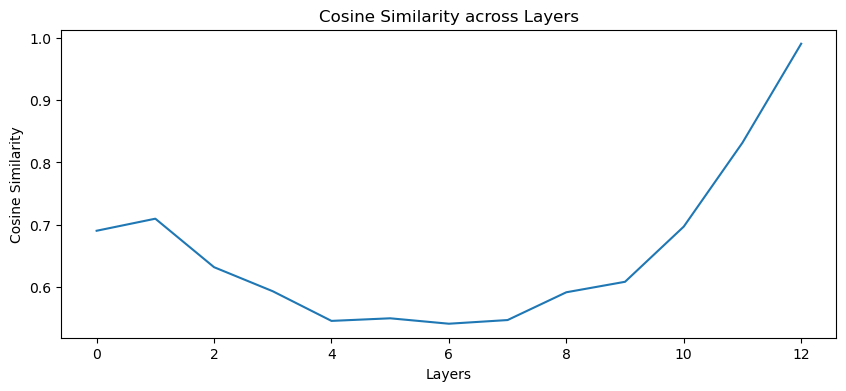

In [126]:
plt.figure(figsize=(10,4))
plt.title("Cosine Similarity across Layers")
plt.plot(c)
plt.xlabel("Layers")
plt.ylabel("Cosine Similarity")
# plt.ylim([0.5, 1.05])

In [127]:
c

[0.6899750828742981,
 0.7094007134437561,
 0.6313362717628479,
 0.5925931334495544,
 0.5448496341705322,
 0.549034833908081,
 0.5403095483779907,
 0.5462290048599243,
 0.5909442901611328,
 0.6078193783760071,
 0.6966626644134521,
 0.8317318558692932,
 0.9910957217216492]